In [22]:
import numpy as np
import pandas as pd
import random
from collections import Counter
from scipy.stats import rankdata
import matplotlib.pyplot as plt 

In [23]:
sc = ['c1','c3','c5','c6'] # semi-core courses (at least one needs to be taken)
course = ['c1','c2','c3','c4','c5','c6','c7','c8'] # all courses

# Dataset Simulation/Generation

In [24]:
def constrained_sum_sample_pos(n, total):
    """Return a randomly chosen list of n positive integers summing to total.
    Each such list is equally likely to occur."""

    dividers = sorted(random.sample(range(1, total), n - 1))
    return [a - b for a, b in zip(dividers + [total], [0] + dividers)]

In [25]:
constrained_sum_sample_pos(5,8)

[1, 1, 1, 3, 2]

In [26]:
random.sample(range(1,6),5)

[2, 4, 3, 1, 5]

In [27]:
# 40 students, the ones with: Course bids + preferences list (not used for allocation)
random.seed(37)

list_data = []
list_a = []

for i in range(40):
    
    a = constrained_sum_sample_pos(8, 1000)

    list_ = []
    num =random.sample(range(1,9),8) 

    for q in range(len(num)) :
        list_.append( 'c' + str(num[q]) )
        
    list_a.append(a)
    list_data.append(list_)
        
df00 = pd.DataFrame(list_a, columns = ['c1','c2','c3','c4','c5','c6','c7','c8']).reset_index(drop = True)
df0 = pd.DataFrame(list_data, columns = ['R1' , 'R2', 'R3', 'R4', 'R5','R6','R7','R8']).reset_index(drop = True)


df00['R1'] = df0['R1']
df00['R2'] = df0['R2']
df00['R3'] = df0['R3']
df00['R4'] = df0['R4']
df00['R5'] = df0['R5']
df00['R6'] = df0['R6']
df00['R7'] = df0['R7']
df00['R8'] = df0['R8']


df2 = df00
df2

,c1,c2,c3,c4,c5,c6,c7,c8,R1,R2,R3,R4,R5,R6,R7,R8
0,94,529,10,49,17,164,95,42,c1,c6,c3,c4,c8,c7,c2,c5
1,148,240,46,21,299,194,49,3,c1,c8,c4,c7,c3,c2,c6,c5
2,35,505,47,68,68,104,167,6,c4,c5,c8,c1,c7,c6,c2,c3
3,25,206,101,29,180,53,131,275,c3,c7,c1,c6,c2,c8,c4,c5
4,44,246,19,214,117,26,273,61,c5,c6,c2,c4,c7,c1,c8,c3
5,3,105,166,176,10,111,94,335,c4,c1,c8,c2,c3,c5,c7,c6
6,66,87,8,357,74,52,30,326,c4,c7,c5,c3,c8,c1,c6,c2
7,115,25,30,47,223,154,118,288,c1,c3,c7,c8,c5,c4,c6,c2
8,70,24,106,118,6,134,533,9,c1,c2,c7,c4,c5,c6,c3,c8
9,202,355,133,47,90,40,4,129,c5,c6,c1,c3,c7,c2,c8,c4


In [28]:
random.seed(37)
# True Ranks

list_data = []
list_a = []
name_array = np.array(['c1', 'c2', 'c3', 'c4' , 'c5', 'c6', 'c7', 'c8'])


for i in range(20):
    a = constrained_sum_sample_pos(8, 1000)
    score_array = np.array(a)
    score_indices = np.argsort(score_array)[::-1] # returns the indices that would sort our array in descending order.
    
    list_data.append(name_array[score_indices])
    list_a.append(a)
    
df00 = pd.DataFrame(list_a, columns = ['c1','c2','c3','c4','c5','c6','c7','c8']).reset_index(drop = True)
df0 = pd.DataFrame(list_data, columns = ['R1' , 'R2', 'R3', 'R4', 'R5','R6','R7','R8']).reset_index(drop = True)

df00['R1'] = df0['R1']
df00['R2'] = df0['R2']
df00['R3'] = df0['R3']
df00['R4'] = df0['R4']
df00['R5'] = df0['R5']
df00['R6'] = df0['R6']
df00['R7'] = df0['R7']
df00['R8'] = df0['R8']

df3 = df00
df3

,c1,c2,c3,c4,c5,c6,c7,c8,R1,R2,R3,R4,R5,R6,R7,R8
0,94,529,10,49,17,164,95,42,c2,c6,c7,c1,c4,c8,c5,c3
1,37,342,149,119,3,115,90,145,c2,c3,c8,c4,c6,c7,c1,c5
2,111,338,19,73,75,84,109,191,c2,c8,c1,c7,c6,c5,c4,c3
3,289,99,46,320,61,133,49,3,c4,c1,c6,c2,c5,c7,c3,c8
4,148,307,365,39,66,58,12,5,c3,c2,c1,c5,c6,c4,c7,c8
5,51,26,17,202,128,133,396,47,c7,c4,c6,c5,c1,c8,c2,c3
6,370,73,134,25,62,58,125,153,c1,c8,c3,c7,c2,c5,c6,c4
7,35,340,212,68,68,104,167,6,c2,c3,c7,c6,c5,c4,c1,c8
8,9,56,154,208,91,22,95,365,c8,c4,c3,c7,c5,c2,c6,c1
9,8,63,299,153,149,53,208,67,c3,c7,c4,c5,c8,c2,c6,c1


In [29]:
df = pd.concat([df2,df3],axis=0, ignore_index= True)
df.index.name = 'UNI'
df

,c1,c2,c3,c4,c5,c6,c7,c8,R1,R2,R3,R4,R5,R6,R7,R8
UNI,,,,,,,,,,,,,,,,
0,94,529,10,49,17,164,95,42,c1,c6,c3,c4,c8,c7,c2,c5
1,148,240,46,21,299,194,49,3,c1,c8,c4,c7,c3,c2,c6,c5
2,35,505,47,68,68,104,167,6,c4,c5,c8,c1,c7,c6,c2,c3
3,25,206,101,29,180,53,131,275,c3,c7,c1,c6,c2,c8,c4,c5
4,44,246,19,214,117,26,273,61,c5,c6,c2,c4,c7,c1,c8,c3
5,3,105,166,176,10,111,94,335,c4,c1,c8,c2,c3,c5,c7,c6
6,66,87,8,357,74,52,30,326,c4,c7,c5,c3,c8,c1,c6,c2
7,115,25,30,47,223,154,118,288,c1,c3,c7,c8,c5,c4,c6,c2
8,70,24,106,118,6,134,533,9,c1,c2,c7,c4,c5,c6,c3,c8


## get_pref: True preferences (over R)

In [30]:
def get_pref(df, sc=False):
    '''
    Returns a dictionary of students' preferences, with student UNI as the key
    sc=False gives all courses, sc=True gives only semi-core courses
    '''
    pref_dict = {}
    if sc:
        for UNI, row in df.loc[:, 'R1':'R8'].iterrows():
            sc_list = []
            for c in row.values:
                if c in ['c1','c3','c5','c6']: # if course is semi-core
                    sc_list.append(c)
            pref_dict[UNI] = sc_list

    else:  
        for UNI, row in df.loc[:,'R1':'R8'].iterrows():
            pref_dict[UNI] = list(row.values)

    return pref_dict

In [31]:
get_pref(df, sc = False)

{0: ['c1', 'c6', 'c3', 'c4', 'c8', 'c7', 'c2', 'c5'],
 1: ['c1', 'c8', 'c4', 'c7', 'c3', 'c2', 'c6', 'c5'],
 2: ['c4', 'c5', 'c8', 'c1', 'c7', 'c6', 'c2', 'c3'],
 3: ['c3', 'c7', 'c1', 'c6', 'c2', 'c8', 'c4', 'c5'],
 4: ['c5', 'c6', 'c2', 'c4', 'c7', 'c1', 'c8', 'c3'],
 5: ['c4', 'c1', 'c8', 'c2', 'c3', 'c5', 'c7', 'c6'],
 6: ['c4', 'c7', 'c5', 'c3', 'c8', 'c1', 'c6', 'c2'],
 7: ['c1', 'c3', 'c7', 'c8', 'c5', 'c4', 'c6', 'c2'],
 8: ['c1', 'c2', 'c7', 'c4', 'c5', 'c6', 'c3', 'c8'],
 9: ['c5', 'c6', 'c1', 'c3', 'c7', 'c2', 'c8', 'c4'],
 10: ['c6', 'c1', 'c3', 'c4', 'c7', 'c2', 'c5', 'c8'],
 11: ['c1', 'c6', 'c7', 'c3', 'c4', 'c5', 'c8', 'c2'],
 12: ['c4', 'c2', 'c7', 'c6', 'c3', 'c1', 'c8', 'c5'],
 13: ['c6', 'c5', 'c1', 'c2', 'c3', 'c4', 'c7', 'c8'],
 14: ['c4', 'c5', 'c6', 'c7', 'c1', 'c2', 'c3', 'c8'],
 15: ['c4', 'c1', 'c2', 'c6', 'c8', 'c5', 'c3', 'c7'],
 16: ['c1', 'c3', 'c6', 'c4', 'c7', 'c8', 'c5', 'c2'],
 17: ['c1', 'c8', 'c7', 'c5', 'c2', 'c6', 'c3', 'c4'],
 18: ['c8', 'c7', 'c

In [32]:
get_pref(df, True)

{0: ['c1', 'c6', 'c3', 'c5'],
 1: ['c1', 'c3', 'c6', 'c5'],
 2: ['c5', 'c1', 'c6', 'c3'],
 3: ['c3', 'c1', 'c6', 'c5'],
 4: ['c5', 'c6', 'c1', 'c3'],
 5: ['c1', 'c3', 'c5', 'c6'],
 6: ['c5', 'c3', 'c1', 'c6'],
 7: ['c1', 'c3', 'c5', 'c6'],
 8: ['c1', 'c5', 'c6', 'c3'],
 9: ['c5', 'c6', 'c1', 'c3'],
 10: ['c6', 'c1', 'c3', 'c5'],
 11: ['c1', 'c6', 'c3', 'c5'],
 12: ['c6', 'c3', 'c1', 'c5'],
 13: ['c6', 'c5', 'c1', 'c3'],
 14: ['c5', 'c6', 'c1', 'c3'],
 15: ['c1', 'c6', 'c5', 'c3'],
 16: ['c1', 'c3', 'c6', 'c5'],
 17: ['c1', 'c5', 'c6', 'c3'],
 18: ['c3', 'c6', 'c5', 'c1'],
 19: ['c3', 'c1', 'c5', 'c6'],
 20: ['c6', 'c3', 'c1', 'c5'],
 21: ['c5', 'c1', 'c6', 'c3'],
 22: ['c5', 'c1', 'c3', 'c6'],
 23: ['c3', 'c1', 'c6', 'c5'],
 24: ['c5', 'c6', 'c3', 'c1'],
 25: ['c6', 'c5', 'c1', 'c3'],
 26: ['c5', 'c1', 'c6', 'c3'],
 27: ['c6', 'c3', 'c1', 'c5'],
 28: ['c1', 'c5', 'c6', 'c3'],
 29: ['c1', 'c3', 'c6', 'c5'],
 30: ['c1', 'c5', 'c6', 'c3'],
 31: ['c5', 'c3', 'c6', 'c1'],
 32: ['c6', 'c5', 

## get_bid_pref: bid preferences (over bids)

In [33]:
def get_bid_pref(df, sc=False):
    '''
    Returns a dictionary of students' preferences, derived from course bids.
    Student UNI as key.
    sc=False gives all courses, sc=True gives only semi-core courses
    '''
    pref_dict = {}
    if sc:
        for index, row in df.loc[:,'c1':'c8'].iterrows():
            sc_list = []
            for c in row.sort_values(ascending=False).index.values:
                if c in ['c1','c3','c5','c6']: # if course is semi-core
                    sc_list.append(c)
            pref_dict[index] = sc_list

    else:
        for index, row in df.loc[:,'c1':'c8'].iterrows():
            pref_dict[index] = list(row.sort_values(ascending=False).index.values)

    return pref_dict

In [34]:
get_bid_pref(df, False)

{0: ['c2', 'c6', 'c7', 'c1', 'c4', 'c8', 'c5', 'c3'],
 1: ['c5', 'c2', 'c6', 'c1', 'c7', 'c3', 'c4', 'c8'],
 2: ['c2', 'c7', 'c6', 'c4', 'c5', 'c3', 'c1', 'c8'],
 3: ['c8', 'c2', 'c5', 'c7', 'c3', 'c6', 'c4', 'c1'],
 4: ['c7', 'c2', 'c4', 'c5', 'c8', 'c1', 'c6', 'c3'],
 5: ['c8', 'c4', 'c3', 'c6', 'c2', 'c7', 'c5', 'c1'],
 6: ['c4', 'c8', 'c2', 'c5', 'c1', 'c6', 'c7', 'c3'],
 7: ['c8', 'c5', 'c6', 'c7', 'c1', 'c4', 'c3', 'c2'],
 8: ['c7', 'c6', 'c4', 'c3', 'c1', 'c2', 'c8', 'c5'],
 9: ['c2', 'c1', 'c3', 'c8', 'c5', 'c4', 'c6', 'c7'],
 10: ['c4', 'c1', 'c7', 'c5', 'c2', 'c6', 'c3', 'c8'],
 11: ['c7', 'c5', 'c6', 'c3', 'c2', 'c8', 'c1', 'c4'],
 12: ['c4', 'c7', 'c3', 'c1', 'c8', 'c5', 'c2', 'c6'],
 13: ['c7', 'c6', 'c4', 'c2', 'c5', 'c1', 'c3', 'c8'],
 14: ['c7', 'c2', 'c5', 'c6', 'c4', 'c1', 'c3', 'c8'],
 15: ['c3', 'c6', 'c2', 'c7', 'c4', 'c5', 'c1', 'c8'],
 16: ['c5', 'c6', 'c8', 'c1', 'c4', 'c2', 'c3', 'c7'],
 17: ['c1', 'c4', 'c2', 'c3', 'c6', 'c8', 'c5', 'c7'],
 18: ['c4', 'c1', 'c

In [35]:
get_bid_pref(df, True)

{0: ['c6', 'c1', 'c5', 'c3'],
 1: ['c5', 'c6', 'c1', 'c3'],
 2: ['c6', 'c5', 'c3', 'c1'],
 3: ['c5', 'c3', 'c6', 'c1'],
 4: ['c5', 'c1', 'c6', 'c3'],
 5: ['c3', 'c6', 'c5', 'c1'],
 6: ['c5', 'c1', 'c6', 'c3'],
 7: ['c5', 'c6', 'c1', 'c3'],
 8: ['c6', 'c3', 'c1', 'c5'],
 9: ['c1', 'c3', 'c5', 'c6'],
 10: ['c1', 'c5', 'c6', 'c3'],
 11: ['c5', 'c6', 'c3', 'c1'],
 12: ['c3', 'c1', 'c5', 'c6'],
 13: ['c6', 'c5', 'c1', 'c3'],
 14: ['c5', 'c6', 'c1', 'c3'],
 15: ['c3', 'c6', 'c5', 'c1'],
 16: ['c5', 'c6', 'c1', 'c3'],
 17: ['c1', 'c3', 'c6', 'c5'],
 18: ['c1', 'c5', 'c6', 'c3'],
 19: ['c6', 'c1', 'c3', 'c5'],
 20: ['c6', 'c1', 'c5', 'c3'],
 21: ['c3', 'c1', 'c6', 'c5'],
 22: ['c3', 'c1', 'c5', 'c6'],
 23: ['c3', 'c6', 'c1', 'c5'],
 24: ['c1', 'c3', 'c5', 'c6'],
 25: ['c3', 'c6', 'c5', 'c1'],
 26: ['c3', 'c6', 'c5', 'c1'],
 27: ['c6', 'c5', 'c3', 'c1'],
 28: ['c1', 'c3', 'c6', 'c5'],
 29: ['c3', 'c1', 'c5', 'c6'],
 30: ['c3', 'c6', 'c1', 'c5'],
 31: ['c5', 'c3', 'c1', 'c6'],
 32: ['c6', 'c1', 

In [36]:
def capacity(df, same=True, buffer=3):
    """
    Generate course capacities
    """
    cap = {c: 0 for c in course}
    
    if not same:
        # 4 semi-core courses take at least len(df) people
        capOfSC = round(len(df)/4)
        lastSC = len(df) - 3*capOfSC
        for c in sc:
            cap[c] += capOfSC
        cap[sc[0]] = lastSC

        remainTotalSeats = 3*len(df) - 3*capOfSC - lastSC
        capOfAll = round(remainTotalSeats/8)
        for c in course:
            cap[c] += capOfAll

        ldCap = {c: len(df) for c in ld}
        cap.update(ldCap)
    
    if same:
        # as per Yuri's recc, give all classes same capacity
        # allCap = minimum capacity per class + some buffer
        allCap = round(3*len(df)/5) + buffer #(3∗total students ÷5)+3
        cap = {c: allCap for c in course}

    return cap

In [37]:
capacity(df,False,3)

NameError: name 'ld' is not defined

In [ ]:
# For now, we just consider the same capacity for all courses
capacity(df,True,3)

{'c1': 39,
 'c2': 39,
 'c3': 39,
 'c4': 39,
 'c5': 39,
 'c6': 39,
 'c7': 39,
 'c8': 39}

In [ ]:
df

,c1,c2,c3,c4,c5,c6,c7,c8,R1,R2,R3,R4,R5,R6,R7,R8
UNI,,,,,,,,,,,,,,,,
0,94,529,10,49,17,164,95,42,c1,c6,c3,c4,c8,c7,c2,c5
1,148,240,46,21,299,194,49,3,c1,c8,c4,c7,c3,c2,c6,c5
2,35,505,47,68,68,104,167,6,c4,c5,c8,c1,c7,c6,c2,c3
3,25,206,101,29,180,53,131,275,c3,c7,c1,c6,c2,c8,c4,c5
4,44,246,19,214,117,26,273,61,c5,c6,c2,c4,c7,c1,c8,c3
5,3,105,166,176,10,111,94,335,c4,c1,c8,c2,c3,c5,c7,c6
6,66,87,8,357,74,52,30,326,c4,c7,c5,c3,c8,c1,c6,c2
7,115,25,30,47,223,154,118,288,c1,c3,c7,c8,c5,c4,c6,c2
8,70,24,106,118,6,134,533,9,c1,c2,c7,c4,c5,c6,c3,c8


In [ ]:
# The number of times, each course had the highest bid
n_high_course = np.zeros(8)
for i in range(len(df)):
    array = df.iloc[i, [0,1,2,3,4,5,6,7]].values
    a = array.argmax()
    n_high_course[a] +=1
    
print(n_high_course)

[ 3. 12. 12.  7.  3.  1. 10. 12.]


In [ ]:
# The number of times, each course had the highest rank (R)
n_high_rank = np.zeros(8)
for i in range(len(df)):
    array = df.iloc[i, [8,9,10,11,12,13,14,15]].values
    a = array.argmax()
    n_high_rank[a] +=1
    
print(n_high_rank)

[10.  6.  9.  5.  8.  9.  5.  8.]


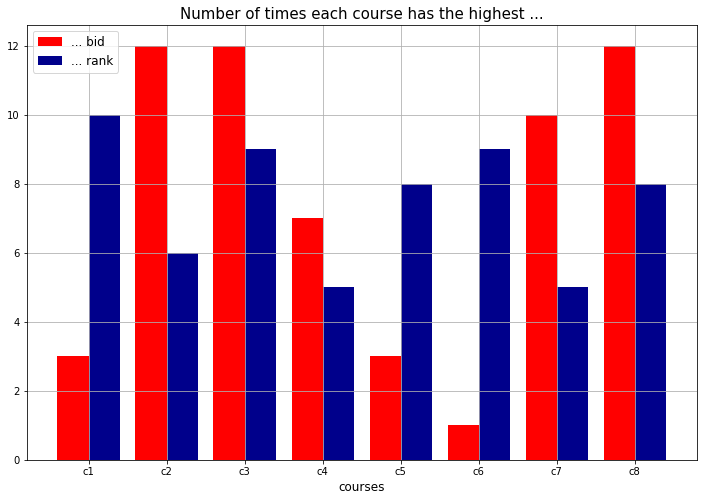

In [ ]:
plt.figure(figsize=(12,8))
x = np.arange(len(['c1','c2','c3','c4','c5','c6','c7','c8']))

#width of each bar
width = 0.40

plt.bar(x - width/2, n_high_course, width, label='... bid', color='red')
plt.bar(x + width/2, n_high_rank, width, label='... rank',color='darkblue')

plt.xlabel('courses', fontsize=12)
plt.xticks(x, ['c1','c2','c3','c4','c5','c6','c7','c8'])
plt.title('Number of times each course has the highest ...', fontsize=15)
plt.legend(fontsize = 12)
plt.grid()

plt.show()

### Monday, Apr. 17

In [ ]:
def new_capacity(c, k, bid_sc_k):
        """
        calculate new capacity, which is the capacity after some seats of the courses are taken
        """
        kk = 0
        if bid_sc_k.get(c):
            kk = len(bid_sc_k.get(c))
        return k - kk

In [ ]:
def assignSemiCore(df, bidPref=False, verbose=True): # if bidPref=True, it uses the preferences from the bids (which is when test=1)
    """
    first, let's assign one of the semi-core courses to satisfy the second constraint
    """
    stop = False
    r = 0                                   # round 0 ==> the first round
    cap = capacity(df)                      # initial capacity
    if bidPref:
        pref_sc = get_bid_pref(df, sc=True) 
    else:
        pref_sc = get_pref(df, sc=True)     
    pref_sc_z = {}                          # in order to update each round 
    rejected = pref_sc.keys()

    while not stop:
        # get first(round#) sc course on each one's pref list
        pref_sc_r = {u: x[r] for (u,x) in pref_sc.items() if u in rejected}
        # modify pref list
        pref_sc_z.update(pref_sc_r)   # here because later updating bid list would be the same

        # rank students for each sc by bidding
        bid_sc = {c: sorted([((df).loc[u,c], u) 
                      for u in pref_sc_z.keys() 
                      if pref_sc_z[u] == c], reverse=True) 
                  for c in sc}

        # keep top k students
        bid_sc_k = {c: s[:cap[c]] for (c, s) in bid_sc.items()}

        # find the list of unmatched student unis
        rejected = [i[1] for l in [s[cap[c]:] for (c, s) in bid_sc.items()] for i in l]

        if rejected: # if it's not empty
            r += 1
        else:
            stop = True
    
    # update capacity
    cap = {c: new_capacity(c, k, bid_sc_k) for (c, k) in cap.items()}
    start_cap = capacity(df)
    
    r1 = r+1
    
    print('the assigned students with their bid values to each semi-core course is as follows: ', bid_sc_k)
    return bid_sc_k, cap, r1, start_cap

In [ ]:
[bid_sc_k, cap, r1, start_cap] = assignSemiCore(df, bidPref=False, verbose=True)
# e.g. course c1: 1) the assigned student is id=41, with the bid value of 415. 2) id=50, bid value=409 , ...

the assigned students with their bid values to each semi-core course is as follows:  {'c1': [(483, 17), (370, 46), (289, 43), (224, 52), (161, 30), (160, 28), (148, 1), (123, 29), (116, 16), (115, 7), (111, 42), (94, 0), (70, 8), (38, 11), (31, 15), (3, 5)], 'c3': [(723, 51), (409, 23), (365, 44), (342, 55), (299, 49), (267, 58), (212, 47), (154, 48), (149, 41), (114, 36), (111, 59), (101, 3), (54, 19), (10, 18)], 'c5': [(331, 53), (265, 35), (220, 54), (184, 33), (169, 34), (157, 14), (144, 31), (117, 4), (90, 9), (74, 6), (68, 2), (60, 37), (47, 24), (45, 21), (41, 22), (23, 26)], 'c6': [(277, 32), (238, 39), (226, 20), (211, 56), (209, 13), (197, 57), (180, 50), (164, 40), (150, 27), (133, 45), (126, 25), (76, 38), (74, 10), (30, 12)]}


In [ ]:
# capacity of classes after assigning the semi-core courses
cap
# (as can be seen, the capacity for only core courses are reduced)

{'c1': 23,
 'c2': 39,
 'c3': 25,
 'c4': 39,
 'c5': 23,
 'c6': 25,
 'c7': 39,
 'c8': 39}

In [ ]:
# now, let's see which semi-core course each student is assigned to (student id: course)
def convertToStudentPers(courseView):
    """
    To see the courses assigned to each student (student's perspective)
    """
    courseViewUni = {c: [s[1] for s in courseView[c]] for c in courseView.keys()}
    studenView = {u: [] for l in courseViewUni.values() for u in l}
    for c in courseViewUni.keys():
        for u in courseViewUni[c]:
            studenView[u].append(c)
    return studenView

In [ ]:
bid_sc_k

{'c1': [(483, 17),
  (370, 46),
  (289, 43),
  (224, 52),
  (161, 30),
  (160, 28),
  (148, 1),
  (123, 29),
  (116, 16),
  (115, 7),
  (111, 42),
  (94, 0),
  (70, 8),
  (38, 11),
  (31, 15),
  (3, 5)],
 'c3': [(723, 51),
  (409, 23),
  (365, 44),
  (342, 55),
  (299, 49),
  (267, 58),
  (212, 47),
  (154, 48),
  (149, 41),
  (114, 36),
  (111, 59),
  (101, 3),
  (54, 19),
  (10, 18)],
 'c5': [(331, 53),
  (265, 35),
  (220, 54),
  (184, 33),
  (169, 34),
  (157, 14),
  (144, 31),
  (117, 4),
  (90, 9),
  (74, 6),
  (68, 2),
  (60, 37),
  (47, 24),
  (45, 21),
  (41, 22),
  (23, 26)],
 'c6': [(277, 32),
  (238, 39),
  (226, 20),
  (211, 56),
  (209, 13),
  (197, 57),
  (180, 50),
  (164, 40),
  (150, 27),
  (133, 45),
  (126, 25),
  (76, 38),
  (74, 10),
  (30, 12)]}

In [ ]:
convertToStudentPers(bid_sc_k)

{17: ['c1'],
 46: ['c1'],
 43: ['c1'],
 52: ['c1'],
 30: ['c1'],
 28: ['c1'],
 1: ['c1'],
 29: ['c1'],
 16: ['c1'],
 7: ['c1'],
 42: ['c1'],
 0: ['c1'],
 8: ['c1'],
 11: ['c1'],
 15: ['c1'],
 5: ['c1'],
 51: ['c3'],
 23: ['c3'],
 44: ['c3'],
 55: ['c3'],
 49: ['c3'],
 58: ['c3'],
 47: ['c3'],
 48: ['c3'],
 41: ['c3'],
 36: ['c3'],
 59: ['c3'],
 3: ['c3'],
 19: ['c3'],
 18: ['c3'],
 53: ['c5'],
 35: ['c5'],
 54: ['c5'],
 33: ['c5'],
 34: ['c5'],
 14: ['c5'],
 31: ['c5'],
 4: ['c5'],
 9: ['c5'],
 6: ['c5'],
 2: ['c5'],
 37: ['c5'],
 24: ['c5'],
 21: ['c5'],
 22: ['c5'],
 26: ['c5'],
 32: ['c6'],
 39: ['c6'],
 20: ['c6'],
 56: ['c6'],
 13: ['c6'],
 57: ['c6'],
 50: ['c6'],
 40: ['c6'],
 27: ['c6'],
 45: ['c6'],
 25: ['c6'],
 38: ['c6'],
 10: ['c6'],
 12: ['c6']}

In [ ]:
# now, let's do the main assignment
def assign(df, pref, cap, courseNum=3, verbose=True):
        """
        General assignment (3 courses default)
        """
        stop = False
        r = 0                                                
        rejected = pref.keys()
        nextProposeQuota = {u: (courseNum+1) for u in rejected}  # # of courses rejected last turn
        propose = {u: [] for u in pref.keys()}               # store courses to be proposed in each turn
        proposed = {u: [] for u in pref.keys()}             # store proposed courses

        while not stop:
            if r<=5:
                # first propose to other courses, then propose to quota courses
                newPropose = {u: [c for c in x if c not in proposed[u]][:nextProposeQuota[u]]
                                  for (u,x) in pref.items() if u in set(rejected)}
                # update propose and proposed
                for u in newPropose.keys():
                    propose[u].extend(newPropose[u])
                    proposed[u].extend(newPropose[u])
                # print(propose) 

                # index bids
                bid1 = {c: [((df).loc[u,c], u) for u in propose.keys() if propose[u][0] == c] 
                       for c in course}
                bid2 = {c: [((df).loc[u,c], u) for u in propose.keys() if propose[u][1] == c]
                       for c in course}
                bid3 = {c: [((df).loc[u,c], u) for u in propose.keys() if propose[u][2] == c]
                       for c in course}
#                 bid4 = {c: [((df).loc[u,c], u) for u in propose.keys() if propose[u][3] == c]
#                        for c in course}


                bid = {c: sorted(l + bid2[c] + bid3[c], reverse=True) for (c,l) in bid1.items()}

#                 # keep top k students
#                 bid_k = {c: s[:cap[c]] for (c, s) in bid.items()}

                # find the list of unmatched student unis
                rejected = [i[1] for l in [s[cap[c]:] for (c, s) in bid.items()] for i in l]

                # record current proposal
                propose = {u: [] for u in pref.keys()}
                propose.update(convertToStudentPers(bid))      

                if rejected: 
                    r += 1
                    nextProposeQuota = Counter(rejected)
                else:
                    stop = True
            else:
                break;
        r2 = r+1
        #print(bid_k)
        return bid, r2            

In [ ]:
bid, r2 = assign(df,get_bid_pref(df),cap,6,True)

In [ ]:
bid #(bid, id of the student)

{'c1': [(483, 17),
  (370, 46),
  (361, 24),
  (289, 43),
  (265, 32),
  (235, 18),
  (224, 52),
  (210, 10),
  (202, 9),
  (173, 38),
  (173, 20),
  (161, 30),
  (160, 28),
  (148, 44),
  (147, 54),
  (136, 37),
  (111, 42)],
 'c2': [(529, 40),
  (529, 0),
  (505, 2),
  (458, 19),
  (420, 36),
  (355, 9),
  (342, 41),
  (340, 47),
  (338, 42),
  (331, 31),
  (307, 44),
  (246, 4),
  (243, 20),
  (240, 1),
  (236, 53),
  (227, 28),
  (221, 29),
  (206, 3),
  (179, 24),
  (171, 27),
  (164, 26),
  (161, 14),
  (158, 59),
  (139, 50),
  (139, 39),
  (138, 15),
  (103, 17),
  (94, 23),
  (87, 6),
  (35, 57)],
 'c3': [(723, 51),
  (617, 22),
  (409, 23),
  (365, 44),
  (342, 55),
  (341, 26),
  (309, 30),
  (303, 15),
  (299, 49),
  (267, 58),
  (256, 25),
  (240, 29),
  (216, 34),
  (212, 47),
  (200, 12),
  (166, 5),
  (156, 21),
  (154, 48),
  (149, 41),
  (134, 46),
  (133, 9),
  (122, 28)],
 'c4': [(357, 6),
  (331, 37),
  (320, 43),
  (314, 12),
  (302, 18),
  (300, 27),
  (268, 10),

In [ ]:
convertToStudentPers(bid)

{17: ['c1', 'c2', 'c4'],
 46: ['c1', 'c3', 'c8'],
 24: ['c1', 'c2', 'c7'],
 43: ['c1', 'c4', 'c6'],
 32: ['c1', 'c6', 'c7'],
 18: ['c1', 'c4', 'c5'],
 52: ['c1', 'c4', 'c8'],
 10: ['c1', 'c4', 'c7'],
 9: ['c1', 'c2', 'c3'],
 38: ['c1', 'c4', 'c8'],
 20: ['c1', 'c2', 'c6'],
 30: ['c1', 'c3', 'c6'],
 28: ['c1', 'c2', 'c3'],
 44: ['c1', 'c2', 'c3'],
 54: ['c1', 'c5', 'c8'],
 37: ['c1', 'c4', 'c7'],
 42: ['c1', 'c2', 'c8'],
 40: ['c2', 'c6', 'c7'],
 0: ['c2', 'c6', 'c7'],
 2: ['c2', 'c6', 'c7'],
 19: ['c2', 'c6', 'c8'],
 36: ['c2', 'c4', 'c7'],
 41: ['c2', 'c3', 'c8'],
 47: ['c2', 'c3', 'c7'],
 31: ['c2', 'c5', 'c8'],
 4: ['c2', 'c4', 'c7'],
 1: ['c2', 'c5', 'c6'],
 53: ['c2', 'c5', 'c7'],
 29: ['c2', 'c3', 'c4'],
 3: ['c2', 'c5', 'c8'],
 27: ['c2', 'c4', 'c7'],
 26: ['c2', 'c3', 'c4'],
 14: ['c2', 'c5', 'c7'],
 59: ['c2', 'c4', 'c8'],
 50: ['c2', 'c6', 'c8'],
 39: ['c2', 'c6', 'c8'],
 15: ['c2', 'c3', 'c6'],
 23: ['c2', 'c3', 'c8'],
 6: ['c2', 'c4', 'c8'],
 57: ['c2', 'c6', 'c8'],
 51: ['

In [ ]:
def delete_pref(pref, view):  
    for (u,x) in view.items():
        for j in range(5):
            if [pref[u][j]] == x:
                idx = j
                #idx = pref[u][j]
        del pref[u][idx]
    return pref

In [ ]:
pref = get_bid_pref(df)
view = convertToStudentPers(bid_sc_k)
view

{17: ['c1'],
 46: ['c1'],
 43: ['c1'],
 52: ['c1'],
 30: ['c1'],
 28: ['c1'],
 1: ['c1'],
 29: ['c1'],
 16: ['c1'],
 7: ['c1'],
 42: ['c1'],
 0: ['c1'],
 8: ['c1'],
 11: ['c1'],
 15: ['c1'],
 5: ['c1'],
 51: ['c3'],
 23: ['c3'],
 44: ['c3'],
 55: ['c3'],
 49: ['c3'],
 58: ['c3'],
 47: ['c3'],
 48: ['c3'],
 41: ['c3'],
 36: ['c3'],
 59: ['c3'],
 3: ['c3'],
 19: ['c3'],
 18: ['c3'],
 53: ['c5'],
 35: ['c5'],
 54: ['c5'],
 33: ['c5'],
 34: ['c5'],
 14: ['c5'],
 31: ['c5'],
 4: ['c5'],
 9: ['c5'],
 6: ['c5'],
 2: ['c5'],
 37: ['c5'],
 24: ['c5'],
 21: ['c5'],
 22: ['c5'],
 26: ['c5'],
 32: ['c6'],
 39: ['c6'],
 20: ['c6'],
 56: ['c6'],
 13: ['c6'],
 57: ['c6'],
 50: ['c6'],
 40: ['c6'],
 27: ['c6'],
 45: ['c6'],
 25: ['c6'],
 38: ['c6'],
 10: ['c6'],
 12: ['c6']}

In [ ]:
pref_ = delete_pref(pref,view)
pref_

{0: ['c2', 'c6', 'c7', 'c4', 'c8', 'c5', 'c3'],
 1: ['c5', 'c2', 'c6', 'c7', 'c3', 'c4', 'c8'],
 2: ['c2', 'c7', 'c6', 'c4', 'c3', 'c1', 'c8'],
 3: ['c8', 'c2', 'c5', 'c7', 'c6', 'c4', 'c1'],
 4: ['c7', 'c2', 'c4', 'c8', 'c1', 'c6', 'c3'],
 5: ['c8', 'c4', 'c3', 'c6', 'c7', 'c5', 'c1'],
 6: ['c4', 'c8', 'c2', 'c1', 'c6', 'c7', 'c3'],
 7: ['c8', 'c5', 'c6', 'c7', 'c4', 'c3', 'c2'],
 8: ['c7', 'c6', 'c4', 'c3', 'c2', 'c8', 'c5'],
 9: ['c2', 'c1', 'c3', 'c8', 'c4', 'c6', 'c7'],
 10: ['c4', 'c1', 'c7', 'c2', 'c6', 'c3', 'c8'],
 11: ['c7', 'c5', 'c6', 'c3', 'c8', 'c1', 'c4'],
 12: ['c4', 'c7', 'c3', 'c8', 'c5', 'c2', 'c6'],
 13: ['c7', 'c4', 'c2', 'c5', 'c1', 'c3', 'c8'],
 14: ['c7', 'c2', 'c6', 'c4', 'c1', 'c3', 'c8'],
 15: ['c3', 'c6', 'c2', 'c7', 'c5', 'c1', 'c8'],
 16: ['c5', 'c6', 'c8', 'c4', 'c2', 'c3', 'c7'],
 17: ['c4', 'c2', 'c3', 'c6', 'c8', 'c5', 'c7'],
 18: ['c4', 'c1', 'c5', 'c7', 'c8', 'c2', 'c3'],
 19: ['c2', 'c8', 'c6', 'c7', 'c3', 'c4', 'c5'],
 20: ['c2', 'c1', 'c5', 'c7', 

## Results

In [ ]:
def test(df, test, verbose=True):
        """
        test=1 means doing all the assignments based on only bids
        test=2 means doing all the assignments based on bids + true preference
        """

        bidPref = False
        if test == 1:
            bidPref = True
        elif test == 2:
            pass
        else:
            print("Test # out of range!")

        verbose = verbose
        (courseViewSC, cap, r1, start_cap) = assignSemiCore(df, bidPref=bidPref,  verbose=verbose)


        pref_ = get_bid_pref(df) # bid only
        view = convertToStudentPers(courseViewSC)
        
        pref = delete_pref(pref_, view)
        
        (courseView,r2) = assign(df, pref, cap, verbose=verbose)
        
        # get ending capacities
        end_cap = dict()
        for c in courseView.keys():
            end_cap[c] = start_cap[c] - len(courseView[c])
        for c in courseViewSC.keys():
            end_cap[c] -= len(courseViewSC[c])
        
        # convert to {uni: course-list}
        studentViewSC = convertToStudentPers(courseViewSC)
        studentView = convertToStudentPers(courseView)
        # return studentView
        
        # combine sc with other courses
        # The last (fourth) course is the semi-core requirement
        for u in studentView.keys():
            studentView[u].extend(studentViewSC[u])
            

        # some metrics:        
        trueRank = {u: {c: i for (i, c) in enumerate(prefs)} for (u, prefs) in get_pref(df).items()}
        # print(trueRank)
        studentAvgRank = {u: round(sum([trueRank.get(u).get(c) for c in m])/3, 3) for u, m in studentView.items()}
        testAvgRank = round(sum([r for (u, r) in studentAvgRank.items()])/len(trueRank), 4)

        # print('Test Average Rank:', testAvgRank)
        
        return courseView, courseViewSC, studentView, end_cap, trueRank, testAvgRank, studentAvgRank

## Results of bids only

In [ ]:
[courseView1, courseViewSC1, studentView1, end_cap1, trueRank1, testAvgRank1, studentAvgRank1] = test(df, test =1)

the assigned students with their bid values to each semi-core course is as follows:  {'c1': [(483, 17), (370, 46), (361, 24), (289, 43), (235, 18), (224, 52), (210, 10), (202, 9), (173, 38), (160, 28), (136, 37), (111, 42)], 'c3': [(723, 51), (617, 22), (409, 23), (365, 44), (342, 55), (341, 26), (309, 30), (303, 15), (299, 49), (267, 58), (256, 25), (240, 29), (216, 34), (212, 47), (200, 12), (166, 5), (156, 21), (154, 48), (149, 41), (114, 36), (111, 59)], 'c5': [(347, 16), (331, 53), (299, 1), (265, 35), (223, 7), (220, 54), (184, 33), (180, 3), (176, 11), (157, 14), (144, 31), (117, 4), (74, 6)], 'c6': [(277, 32), (238, 39), (226, 20), (211, 56), (209, 13), (197, 57), (180, 50), (164, 40), (164, 0), (150, 27), (134, 8), (133, 45), (113, 19), (104, 2)]}


In [ ]:
studentView1

{32: ['c1', 'c3', 'c7', 'c6'],
 20: ['c1', 'c2', 'c5', 'c6'],
 58: ['c1', 'c7', 'c8', 'c3'],
 30: ['c1', 'c6', 'c7', 'c3'],
 12: ['c1', 'c4', 'c7', 'c3'],
 44: ['c1', 'c2', 'c5', 'c3'],
 1: ['c1', 'c2', 'c6', 'c5'],
 54: ['c1', 'c6', 'c8', 'c5'],
 39: ['c1', 'c2', 'c8', 'c6'],
 29: ['c1', 'c2', 'c4', 'c3'],
 16: ['c1', 'c6', 'c8', 'c5'],
 40: ['c1', 'c2', 'c7', 'c6'],
 0: ['c1', 'c2', 'c7', 'c6'],
 35: ['c1', 'c4', 'c7', 'c5'],
 22: ['c1', 'c4', 'c8', 'c3'],
 2: ['c2', 'c4', 'c7', 'c6'],
 19: ['c2', 'c7', 'c8', 'c6'],
 36: ['c2', 'c4', 'c7', 'c3'],
 9: ['c2', 'c3', 'c8', 'c1'],
 41: ['c2', 'c4', 'c8', 'c3'],
 47: ['c2', 'c6', 'c7', 'c3'],
 42: ['c2', 'c7', 'c8', 'c1'],
 31: ['c2', 'c3', 'c8', 'c5'],
 4: ['c2', 'c4', 'c7', 'c5'],
 53: ['c2', 'c7', 'c8', 'c5'],
 28: ['c2', 'c3', 'c6', 'c1'],
 3: ['c2', 'c7', 'c8', 'c5'],
 24: ['c2', 'c4', 'c7', 'c1'],
 27: ['c2', 'c4', 'c7', 'c6'],
 26: ['c2', 'c4', 'c7', 'c3'],
 14: ['c2', 'c6', 'c7', 'c5'],
 34: ['c2', 'c5', 'c7', 'c3'],
 59: ['c2', 'c

In [ ]:
end_cap1

{'c1': 12, 'c2': 5, 'c3': 8, 'c4': 8, 'c5': 14, 'c6': 9, 'c7': 3, 'c8': 13}

In [ ]:
trueRank1

{0: {'c1': 0, 'c6': 1, 'c3': 2, 'c4': 3, 'c8': 4, 'c7': 5, 'c2': 6, 'c5': 7},
 1: {'c1': 0, 'c8': 1, 'c4': 2, 'c7': 3, 'c3': 4, 'c2': 5, 'c6': 6, 'c5': 7},
 2: {'c4': 0, 'c5': 1, 'c8': 2, 'c1': 3, 'c7': 4, 'c6': 5, 'c2': 6, 'c3': 7},
 3: {'c3': 0, 'c7': 1, 'c1': 2, 'c6': 3, 'c2': 4, 'c8': 5, 'c4': 6, 'c5': 7},
 4: {'c5': 0, 'c6': 1, 'c2': 2, 'c4': 3, 'c7': 4, 'c1': 5, 'c8': 6, 'c3': 7},
 5: {'c4': 0, 'c1': 1, 'c8': 2, 'c2': 3, 'c3': 4, 'c5': 5, 'c7': 6, 'c6': 7},
 6: {'c4': 0, 'c7': 1, 'c5': 2, 'c3': 3, 'c8': 4, 'c1': 5, 'c6': 6, 'c2': 7},
 7: {'c1': 0, 'c3': 1, 'c7': 2, 'c8': 3, 'c5': 4, 'c4': 5, 'c6': 6, 'c2': 7},
 8: {'c1': 0, 'c2': 1, 'c7': 2, 'c4': 3, 'c5': 4, 'c6': 5, 'c3': 6, 'c8': 7},
 9: {'c5': 0, 'c6': 1, 'c1': 2, 'c3': 3, 'c7': 4, 'c2': 5, 'c8': 6, 'c4': 7},
 10: {'c6': 0, 'c1': 1, 'c3': 2, 'c4': 3, 'c7': 4, 'c2': 5, 'c5': 6, 'c8': 7},
 11: {'c1': 0, 'c6': 1, 'c7': 2, 'c3': 3, 'c4': 4, 'c5': 5, 'c8': 6, 'c2': 7},
 12: {'c4': 0, 'c2': 1, 'c7': 2, 'c6': 3, 'c3': 4, 'c1': 5, 'c

In [ ]:
testAvgRank1

3.7334

In [ ]:
studentAvgRank1

{32: 6.667,
 20: 5.0,
 58: 2.0,
 30: 5.0,
 12: 3.667,
 44: 2.0,
 1: 6.0,
 54: 2.0,
 39: 3.333,
 29: 2.0,
 16: 4.333,
 40: 2.0,
 0: 4.0,
 35: 4.667,
 22: 5.0,
 2: 5.0,
 19: 6.0,
 36: 2.667,
 9: 5.333,
 41: 2.0,
 47: 2.0,
 42: 2.0,
 31: 3.333,
 4: 3.0,
 53: 2.0,
 28: 4.667,
 3: 5.667,
 24: 5.0,
 27: 3.333,
 26: 4.333,
 14: 3.667,
 34: 6.0,
 59: 2.0,
 21: 4.667,
 50: 2.0,
 15: 6.0,
 17: 5.667,
 43: 2.0,
 23: 2.0,
 6: 4.333,
 13: 4.667,
 57: 2.0,
 56: 2.0,
 11: 3.667,
 46: 2.0,
 8: 5.333,
 37: 4.667,
 18: 6.0,
 10: 4.667,
 48: 2.0,
 52: 2.0,
 45: 2.0,
 5: 4.333,
 25: 4.667,
 49: 2.0,
 51: 2.0,
 38: 7.333,
 55: 2.0,
 7: 5.0,
 33: 3.333}

## Results of bids+preference

In [ ]:
courseView2, courseViewSC2, studentView2, end_cap2, trueRank2, testAvgRank2, studentAvgRank2 = test(df, test =2)

the assigned students with their bid values to each semi-core course is as follows:  {'c1': [(483, 17), (370, 46), (289, 43), (224, 52), (161, 30), (160, 28), (148, 1), (123, 29), (116, 16), (115, 7), (111, 42), (94, 0), (70, 8), (38, 11), (31, 15), (3, 5)], 'c3': [(723, 51), (409, 23), (365, 44), (342, 55), (299, 49), (267, 58), (212, 47), (154, 48), (149, 41), (114, 36), (111, 59), (101, 3), (54, 19), (10, 18)], 'c5': [(331, 53), (265, 35), (220, 54), (184, 33), (169, 34), (157, 14), (144, 31), (117, 4), (90, 9), (74, 6), (68, 2), (60, 37), (47, 24), (45, 21), (41, 22), (23, 26)], 'c6': [(277, 32), (238, 39), (226, 20), (211, 56), (209, 13), (197, 57), (180, 50), (164, 40), (150, 27), (133, 45), (126, 25), (76, 38), (74, 10), (30, 12)]}


In [ ]:
studentView2

{24: ['c1', 'c2', 'c7', 'c5'],
 32: ['c1', 'c3', 'c7', 'c6'],
 18: ['c1', 'c4', 'c5', 'c3'],
 10: ['c1', 'c4', 'c7', 'c6'],
 9: ['c1', 'c2', 'c3', 'c5'],
 38: ['c1', 'c4', 'c8', 'c6'],
 20: ['c1', 'c2', 'c5', 'c6'],
 58: ['c1', 'c7', 'c8', 'c3'],
 44: ['c1', 'c2', 'c5', 'c3'],
 54: ['c1', 'c6', 'c8', 'c5'],
 37: ['c1', 'c4', 'c7', 'c5'],
 39: ['c1', 'c2', 'c8', 'c6'],
 40: ['c1', 'c2', 'c7', 'c6'],
 35: ['c1', 'c4', 'c7', 'c5'],
 0: ['c2', 'c6', 'c7', 'c1'],
 2: ['c2', 'c6', 'c7', 'c5'],
 19: ['c2', 'c6', 'c8', 'c3'],
 36: ['c2', 'c4', 'c7', 'c3'],
 41: ['c2', 'c4', 'c8', 'c3'],
 47: ['c2', 'c6', 'c7', 'c3'],
 42: ['c2', 'c7', 'c8', 'c1'],
 31: ['c2', 'c3', 'c8', 'c5'],
 4: ['c2', 'c4', 'c7', 'c5'],
 1: ['c2', 'c5', 'c6', 'c1'],
 53: ['c2', 'c7', 'c8', 'c5'],
 28: ['c2', 'c3', 'c6', 'c1'],
 29: ['c2', 'c3', 'c4', 'c1'],
 3: ['c2', 'c5', 'c8', 'c3'],
 27: ['c2', 'c4', 'c7', 'c6'],
 26: ['c2', 'c3', 'c4', 'c5'],
 14: ['c2', 'c6', 'c7', 'c5'],
 34: ['c2', 'c3', 'c7', 'c5'],
 59: ['c2', 'c

In [ ]:
end_cap2

{'c1': 9, 'c2': 6, 'c3': 7, 'c4': 10, 'c5': 9, 'c6': 8, 'c7': 9, 'c8': 14}

In [ ]:
trueRank2

{0: {'c1': 0, 'c6': 1, 'c3': 2, 'c4': 3, 'c8': 4, 'c7': 5, 'c2': 6, 'c5': 7},
 1: {'c1': 0, 'c8': 1, 'c4': 2, 'c7': 3, 'c3': 4, 'c2': 5, 'c6': 6, 'c5': 7},
 2: {'c4': 0, 'c5': 1, 'c8': 2, 'c1': 3, 'c7': 4, 'c6': 5, 'c2': 6, 'c3': 7},
 3: {'c3': 0, 'c7': 1, 'c1': 2, 'c6': 3, 'c2': 4, 'c8': 5, 'c4': 6, 'c5': 7},
 4: {'c5': 0, 'c6': 1, 'c2': 2, 'c4': 3, 'c7': 4, 'c1': 5, 'c8': 6, 'c3': 7},
 5: {'c4': 0, 'c1': 1, 'c8': 2, 'c2': 3, 'c3': 4, 'c5': 5, 'c7': 6, 'c6': 7},
 6: {'c4': 0, 'c7': 1, 'c5': 2, 'c3': 3, 'c8': 4, 'c1': 5, 'c6': 6, 'c2': 7},
 7: {'c1': 0, 'c3': 1, 'c7': 2, 'c8': 3, 'c5': 4, 'c4': 5, 'c6': 6, 'c2': 7},
 8: {'c1': 0, 'c2': 1, 'c7': 2, 'c4': 3, 'c5': 4, 'c6': 5, 'c3': 6, 'c8': 7},
 9: {'c5': 0, 'c6': 1, 'c1': 2, 'c3': 3, 'c7': 4, 'c2': 5, 'c8': 6, 'c4': 7},
 10: {'c6': 0, 'c1': 1, 'c3': 2, 'c4': 3, 'c7': 4, 'c2': 5, 'c5': 6, 'c8': 7},
 11: {'c1': 0, 'c6': 1, 'c7': 2, 'c3': 3, 'c4': 4, 'c5': 5, 'c8': 6, 'c2': 7},
 12: {'c4': 0, 'c2': 1, 'c7': 2, 'c6': 3, 'c3': 4, 'c1': 5, 'c

In [ ]:
testAvgRank2

3.4278

In [ ]:
studentAvgRank2

{24: 3.667,
 32: 6.667,
 18: 6.333,
 10: 2.667,
 9: 3.333,
 38: 5.0,
 20: 5.0,
 58: 2.0,
 44: 2.0,
 54: 2.0,
 37: 3.333,
 39: 3.333,
 40: 2.0,
 35: 4.667,
 0: 4.0,
 2: 5.333,
 19: 5.333,
 36: 2.667,
 41: 2.0,
 47: 2.0,
 42: 2.0,
 31: 3.333,
 4: 3.0,
 1: 6.0,
 53: 2.0,
 28: 4.667,
 29: 2.0,
 3: 5.333,
 27: 3.333,
 26: 3.667,
 14: 3.667,
 34: 6.0,
 59: 2.0,
 50: 2.0,
 15: 4.0,
 17: 5.667,
 43: 2.0,
 23: 2.0,
 6: 4.333,
 13: 4.667,
 57: 2.0,
 22: 4.333,
 30: 5.0,
 25: 4.667,
 12: 3.0,
 5: 2.333,
 21: 5.333,
 56: 2.0,
 46: 2.0,
 48: 2.0,
 52: 2.0,
 45: 2.0,
 49: 2.0,
 8: 3.333,
 51: 2.0,
 16: 4.333,
 7: 4.333,
 11: 2.667,
 55: 2.0,
 33: 3.333}

## Let's Compare the Results

In [ ]:
dfr = pd.DataFrame({'studentAvgRank1' : studentAvgRank1, 'studentAvgRank2' : studentAvgRank2})
dfr

,studentAvgRank1,studentAvgRank2
32,6.667,6.667
20,5.000,5.000
58,2.000,2.000
30,5.000,5.000
12,3.667,3.000
44,2.000,2.000
1,6.000,6.000
54,2.000,2.000
39,3.333,3.333
29,2.000,2.000


In [ ]:
print(dfr['studentAvgRank1'].mean(), dfr['studentAvgRank2'].mean())

3.73335 3.42775


In [ ]:
pd.DataFrame({'studentView1' : studentView1, 'studentView2' : studentView2})

,studentView1,studentView2
32,"[c1, c3, c7, c6]","[c1, c3, c7, c6]"
20,"[c1, c2, c5, c6]","[c1, c2, c5, c6]"
58,"[c1, c7, c8, c3]","[c1, c7, c8, c3]"
30,"[c1, c6, c7, c3]","[c3, c6, c7, c1]"
12,"[c1, c4, c7, c3]","[c3, c4, c7, c6]"
44,"[c1, c2, c5, c3]","[c1, c2, c5, c3]"
1,"[c1, c2, c6, c5]","[c2, c5, c6, c1]"
54,"[c1, c6, c8, c5]","[c1, c6, c8, c5]"
39,"[c1, c2, c8, c6]","[c1, c2, c8, c6]"
29,"[c1, c2, c4, c3]","[c2, c3, c4, c1]"


In [38]:
random.seed(0)
# True Ranks

list_data = []
list_a = []
name_array = np.array(['c1', 'c2', 'c3', 'c4' , 'c5', 'c6', 'c7', 'c8'])


for i in range(60):
    a = constrained_sum_sample_pos(8, 1000)
    score_array = np.array(a)
    score_indices = np.argsort(score_array)[::-1] # returns the indices that would sort our array in descending order.
    
    list_data.append(name_array[score_indices])
    list_a.append(a)
    
df00 = pd.DataFrame(list_a, columns = ['c1','c2','c3','c4','c5','c6','c7','c8']).reset_index(drop = True)
df0 = pd.DataFrame(list_data, columns = ['R1' , 'R2', 'R3', 'R4', 'R5','R6','R7','R8']).reset_index(drop = True)

df00['R1'] = df0['R1']
df00['R2'] = df0['R2']
df00['R3'] = df0['R3']
df00['R4'] = df0['R4']
df00['R5'] = df0['R5']
df00['R6'] = df0['R6']
df00['R7'] = df0['R7']
df00['R8'] = df0['R8']

df3 = df00
df3

,c1,c2,c3,c4,c5,c6,c7,c8,R1,R2,R3,R4,R5,R6,R7,R8
0,42,224,129,36,346,88,47,88,c5,c2,c3,c8,c6,c7,c1,c4
1,415,83,26,279,47,91,48,11,c1,c4,c6,c2,c7,c5,c3,c8
2,311,56,122,109,316,16,62,8,c5,c1,c3,c4,c7,c2,c6,c8
3,98,45,1,80,65,228,257,226,c7,c6,c8,c1,c4,c5,c2,c3
4,257,289,88,89,96,11,102,68,c2,c1,c7,c5,c4,c3,c8,c6
5,76,26,49,167,299,131,176,76,c5,c7,c4,c6,c8,c1,c3,c2
6,104,235,145,90,127,170,50,79,c2,c6,c3,c5,c1,c4,c8,c7
7,210,114,39,82,181,30,279,65,c7,c1,c5,c2,c4,c8,c3,c6
8,267,187,35,45,32,321,103,10,c6,c1,c2,c7,c4,c3,c5,c8
9,15,49,32,466,263,113,3,59,c4,c5,c6,c8,c2,c3,c1,c7


In [39]:
df3.head()

,c1,c2,c3,c4,c5,c6,c7,c8,R1,R2,R3,R4,R5,R6,R7,R8
0,42,224,129,36,346,88,47,88,c5,c2,c3,c8,c6,c7,c1,c4
1,415,83,26,279,47,91,48,11,c1,c4,c6,c2,c7,c5,c3,c8
2,311,56,122,109,316,16,62,8,c5,c1,c3,c4,c7,c2,c6,c8
3,98,45,1,80,65,228,257,226,c7,c6,c8,c1,c4,c5,c2,c3
4,257,289,88,89,96,11,102,68,c2,c1,c7,c5,c4,c3,c8,c6


In [40]:
#Create a model that will allocate students to courses based on their preferences, bids, and course capacities
#create the model in gurobipy and solve it
#import gurobipy as gp
#from gurobipy import GRB
import gurobipy as gp
from gurobipy import GRB

#In the dataframe, columns c1-c8 are the bids, and R1-R8 are the preferences
#There are 8 courses being c1-c8 
#Write a model that will allocate the 60 students to the 8 courses
#The model should maximize the total number of students enrolled in the courses
#The model should also satisfy the following constraints:
#1. Each student should be enrolled in at most 3 courses
#2. Each course should have at most 20 students enrolled in it
#3. Each student should be enrolled in at least 1 course
#4. Each student should be enrolled in at least 1 semi-core course

#create a dictionary of students 
students = df3.index.values

#create a dictionary of courses
courses = df3.columns.values[0:8]

#get the bids for each student
bids = df3.loc[:,'c1':'c8'].to_dict('index')

#start by creating a model
m = gp.Model('student_allocation')

# Create binary decision variables for each student and course combination
x = {}
for s in students:
    for c in courses:
         x[s,c] = m.addVar(vtype=GRB.BINARY, name=f'x_{s}_{c}')

# Set constraints
# 1. Each student should be enrolled in at most 4 courses
for s in students:
    m.addConstr(sum(x[s,c] for c in courses) <= 4, name=f'at_most_3_courses_{s}')

 #2.Add constraint: each course is limited to the their capacity defined in capacity()
for c in courses:
    m.addConstr(gp.quicksum(x[s,c] for s in students) <= capacity(df, sc)[c], name=f'course_{c}_constraint')

for c in courses:
    m.addConstr(gp.quicksum(x[s,c] for s in students) <= capacity(df, c)[c], name=f'course_{c}_constraint')

# 3. Each student should be enrolled in at least 4 course
for s in students:
    m.addConstr(sum(x[s,c] for c in courses) >= 4, name=f'at_least_1_course_{s}')

# 4. Each student should be enrolled in at least 1 semi-core course
for s in students:
    m.addConstr(sum(x[s,c] for c in sc) >= 1, name=f'at_least_1_sc_{s}')

# Set objective
m.setObjective(sum(bids[s][c]*x[s,c] for s in students for c in courses), GRB.MAXIMIZE)

# Solve model
m.optimize()

#Print the solution as a set students with the courses they are enrolled in as a dictionary
solution2 = m.getAttr('x', x)
solution2 = {s: [c for c in courses if solution2[s,c] > 0] for s in students}
solution2


Restricted license - for non-production use only - expires 2024-10-28
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (linux64)

CPU model: Intel(R) Xeon(R) Platinum 8272CL CPU @ 2.60GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 196 rows, 480 columns and 2160 nonzeros
Model fingerprint: 0xb17ced3e
Variable types: 0 continuous, 480 integer (480 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 6e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 4e+01]
Found heuristic solution: objective 28887.000000
Presolve removed 68 rows and 0 columns
Presolve time: 0.00s
Presolved: 128 rows, 480 columns, 1200 nonzeros
Variable types: 0 continuous, 480 integer (480 binary)
Found heuristic solution: objective 44078.000000

Root relaxation: objective 4.869300e+04, 113 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |  

{0: ['c2', 'c3', 'c5', 'c6'],
 1: ['c1', 'c2', 'c4', 'c6'],
 2: ['c1', 'c3', 'c4', 'c5'],
 3: ['c1', 'c6', 'c7', 'c8'],
 4: ['c1', 'c2', 'c5', 'c7'],
 5: ['c4', 'c5', 'c6', 'c7'],
 6: ['c2', 'c3', 'c5', 'c6'],
 7: ['c1', 'c2', 'c5', 'c7'],
 8: ['c1', 'c2', 'c6', 'c7'],
 9: ['c4', 'c5', 'c6', 'c8'],
 10: ['c1', 'c2', 'c5', 'c8'],
 11: ['c2', 'c3', 'c4', 'c6'],
 12: ['c2', 'c5', 'c7', 'c8'],
 13: ['c1', 'c4', 'c5', 'c6'],
 14: ['c3', 'c4', 'c6', 'c8'],
 15: ['c1', 'c2', 'c4', 'c7'],
 16: ['c1', 'c2', 'c3', 'c5'],
 17: ['c1', 'c3', 'c6', 'c7'],
 18: ['c2', 'c5', 'c7', 'c8'],
 19: ['c2', 'c5', 'c7', 'c8'],
 20: ['c3', 'c4', 'c5', 'c8'],
 21: ['c2', 'c4', 'c5', 'c8'],
 22: ['c1', 'c2', 'c3', 'c5'],
 23: ['c1', 'c3', 'c5', 'c8'],
 24: ['c1', 'c3', 'c4', 'c5'],
 25: ['c1', 'c2', 'c5', 'c7'],
 26: ['c2', 'c4', 'c6', 'c7'],
 27: ['c2', 'c3', 'c7', 'c8'],
 28: ['c2', 'c3', 'c6', 'c8'],
 29: ['c1', 'c3', 'c6', 'c8'],
 30: ['c4', 'c5', 'c6', 'c8'],
 31: ['c2', 'c4', 'c5', 'c6'],
 32: ['c3', 'c4', 

In [53]:
#copy the dataframe
df4 = df3.copy()


In [48]:
#Create a dictionary of 1000 minus bid5 through bid8 for each student
true = {}
for s in students:
    true[s] = 1000 - df3.loc[s, 'c5':'c8'].sum()
print(true)


{0: 566, 1: 909, 2: 684, 3: 289, 4: 802, 5: 394, 6: 703, 7: 540, 8: 576, 9: 565, 10: 794, 11: 793, 12: 361, 13: 642, 14: 631, 15: 609, 16: 837, 17: 631, 18: 477, 19: 244, 20: 556, 21: 859, 22: 867, 23: 673, 24: 850, 25: 615, 26: 779, 27: 646, 28: 305, 29: 459, 30: 299, 31: 718, 32: 274, 33: 432, 34: 215, 35: 506, 36: 598, 37: 267, 38: 516, 39: 479, 40: 891, 41: 774, 42: 773, 43: 668, 44: 577, 45: 687, 46: 708, 47: 347, 48: 581, 49: 720, 50: 858, 51: 507, 52: 343, 53: 728, 54: 689, 55: 569, 56: 634, 57: 713, 58: 362, 59: 899}


In [41]:
#Sum the alloacted bids for each student 
for s in students:
    print(f'student {s} is enrolled in {solution2[s]} and the total bid is {sum(bids[s][c] for c in solution2[s])}')

student 0 is enrolled in ['c2', 'c3', 'c5', 'c6'] and the total bid is 787
student 1 is enrolled in ['c1', 'c2', 'c4', 'c6'] and the total bid is 868
student 2 is enrolled in ['c1', 'c3', 'c4', 'c5'] and the total bid is 858
student 3 is enrolled in ['c1', 'c6', 'c7', 'c8'] and the total bid is 809
student 4 is enrolled in ['c1', 'c2', 'c5', 'c7'] and the total bid is 744
student 5 is enrolled in ['c4', 'c5', 'c6', 'c7'] and the total bid is 773
student 6 is enrolled in ['c2', 'c3', 'c5', 'c6'] and the total bid is 677
student 7 is enrolled in ['c1', 'c2', 'c5', 'c7'] and the total bid is 784
student 8 is enrolled in ['c1', 'c2', 'c6', 'c7'] and the total bid is 878
student 9 is enrolled in ['c4', 'c5', 'c6', 'c8'] and the total bid is 901
student 10 is enrolled in ['c1', 'c2', 'c5', 'c8'] and the total bid is 891
student 11 is enrolled in ['c2', 'c3', 'c4', 'c6'] and the total bid is 832
student 12 is enrolled in ['c2', 'c5', 'c7', 'c8'] and the total bid is 770
student 13 is enrolled